#Run .py files

In [2]:
!python functions.py

In [3]:
!python config.py

In [5]:
!python extract.py

Traceback (most recent call last):
  File "C:\Users\akomarla\three_strikes_project\resentencing_data_initiative\code\extract.py", line 3, in <module>
    from google.colab import drive
ModuleNotFoundError: No module named 'google'


In [6]:
!python adult/eligibility_adult.py

Traceback (most recent call last):
  File "C:\Users\akomarla\three_strikes_project\resentencing_data_initiative\code\adult\eligibility_adult.py", line 3, in <module>
    from functions import *
ModuleNotFoundError: No module named 'functions'


In [ ]:
!python adult/summary_adult.py

In [ ]:
!python adult/validation_adult.py

#Run .pynb file 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm

In [ ]:
# Set parameters
county_name = 'Los Angeles'
month = '/'.join(['Rough', 'Data_05_2021', '21_05'])
data_path = '/content/drive/My Drive/Stanford Law 3XP/Data'
code_path = '/content/drive/My Drive/Stanford Law 3XP/Code'

#Sorting Criteria

In [ ]:
county_sort_criteria_sheet = '/'.join([data_path, county_name, 'Criteria/sorting_criteria.xlsx'])

In [ ]:
sorting_criteria = pd.read_excel(county_sort_criteria_sheet)

In [ ]:
sorting_criteria.head()

,Table,Type,Offenses
0,Table A,Serious felonies,136.1
1,Table A,Serious felonies,210.5
2,Table A,Serious felonies,244
3,Table A,Serious felonies,245.2
4,Table A,Serious felonies,245.3


#Demographics

In [ ]:
county_demographics_sheet = '/'.join([data_path, county_name, month, 'demographics.xlsx'])

In [ ]:
# Load the data
demographics = pd.read_excel(county_demographics_sheet)

In [ ]:
demographics.head()

,CDCR #,Name,Birthday,Ethnicity,Gender,Controlling Offense,Description,Offense Begin Date,Offense End Date,Controlling Case Number,...,Current Classication Score,Current Security Level,Classification Score 5 Years\nAgo,Sex Registrant,Mental Health Level of Care,CSRA,DPPV Disability - Mobility,DPPV Disability - Hearing,DPPV Disability - Vision,DPPV Disability - Speech
0,WG4612,"GUIDRY,LAWANICA",1965-12-14,Black,Female,PC187,Murder 1st,2017-03-21,2017-03-21 00:00:00,BA455966,...,44,III,,No,Correction Clinical Case Mgt System,Low,Intermittent Wheelchair User Impacting Placement,Hearing Impairment NOT Impacting Placement,,
1,W38977,"RAMOS,MARSHA",1954-03-03,White,Female,PC187 2nd,Murder 2nd,1987-09-18,1987-09-18 00:00:00,A708668,...,19,II,19,Yes,General Population,Low,,,,
2,WE7745,"CISNEROS,DIANE L.",1950-04-30,Hispanic,Female,PC212.5(c),Robbery 2nd,2013-06-20,2013-06-20 00:00:00,BA412721,...,19,II,26,No,Correction Clinical Case Mgt System,Low,Intermittent Wheelchair User Impacting Placement,,,
3,WF4252,"ANNIS,RAMONA",1962-05-23,Other,Female,PC192(a),Voluntary Manslaughter,2015-08-18,2015-08-18 00:00:00,TA137977,...,19,II,,No,Correction Clinical Case Mgt System,Low,,,,
4,WE9867,"WILKINS,SHERRI L.",1961-03-28,White,Female,PC187 2nd,Murder 2nd,2012-11-24,2012-11-24 00:00:00,YA086025,...,22,II,66,No,General Population,Low,Intermittent Wheelchair User Impacting Placement,,,


Visualizing demographics data

Demographics by ethnicity


<Axes: >

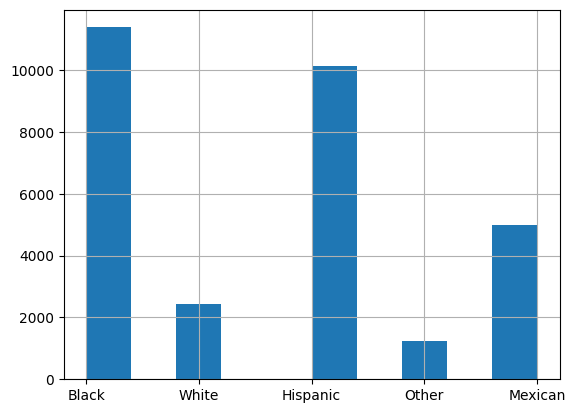

In [ ]:
print('Demographics by ethnicity')
demographics[demographics['Ethnicity'].isin(['Black', 'White', 'Hispanic', 'Mexican', 'Other'])]['Ethnicity'].hist()

Demographics by ethnicity


<Axes: >

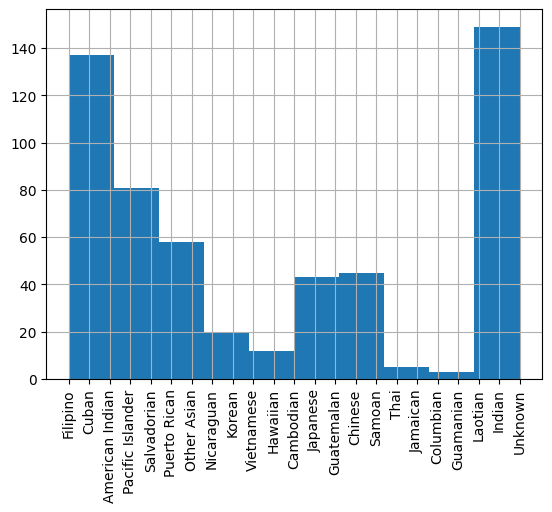

In [ ]:
print('Demographics by ethnicity')
demographics[~demographics['Ethnicity'].isin(['Black', 'White', 'Hispanic', 'Mexican', 'Other'])]['Ethnicity'].hist(xrot = 90)

# Individual Details

In [ ]:
# Education merit
merit_credit_sheet = '/'.join([data_path, county_name, month, 'EducationMeritCredits.xlsx'])
merit_credit = pd.read_excel(merit_credit_sheet)
# Milestone credit
milestone_credit_sheet = '/'.join([data_path, county_name, month, 'MilestoneCompletionCredits.xlsx'])
milestone_credit = pd.read_excel(milestone_credit_sheet)
# Rehab credit
rehab_credit_sheet = '/'.join([data_path, county_name, month, 'RehabilitiveAchievementCredits.xlsx'])
rehab_credit = pd.read_excel(rehab_credit_sheet)
# Vocational education credit
voced_sheet = '/'.join([data_path, county_name, month, 'VocEd_TrainingCerts.xlsx'])
voced_credit = pd.read_excel(voced_sheet)
# Rule violations
rvr_sheet = '/'.join([data_path, county_name, month, 'RVRs.xlsx'])
rv_report = pd.read_excel(rvr_sheet)

#Current Commitments

In [ ]:
county_current_commits_sheet = '/'.join([data_path, county_name, month, 'currentcommitments.xlsx'])

In [ ]:
current_commits = pd.read_excel(county_current_commits_sheet)

In [ ]:
current_commits.head()

,CDCR #,Sentencing County,Case Number,Sentence From Abstract of\nJudgement,Offense,Offense Description,Offense Category,In-prison,Offense Begin Date,Offense End Date,...,Off_Enh2,Off_Enh_Desc2,Off_Enh3,Off_Enh_Desc3,Off_Enh4,Off_Enh_Desc4,Off_Enh5,Off_Enh_Desc5,Off_Enh6,Off_Enh_Desc6
0,A44862,Los Angeles,197499,Life with Parole,PC187,Murder 1st,Crimes Against Persons,,1957-11-11 00:00:00,1957-11-11 00:00:00,...,,,,,,,,,,
1,A44862,Los Angeles,A016192,Life with Parole,PC187,Murder 1st,Crimes Against Persons,In-Prison,1975-09-30 00:00:00,1975-09-30 00:00:00,...,,,,,,,,,,
2,A44862,Los Angeles,A016192,Life with Parole,PC667(a),Prior Felony Convction of Serious Offense,Case Enhancement,,,,...,,,,,,,,,,
3,A44862,Santa Clara,SCL66246,Life with Parole,PC187,Murder 1st,Crimes Against Persons,In-Prison,1975-09-30 00:00:00,1975-09-30 00:00:00,...,,,,,,,,,,
4,A44862,Santa Clara,SCL66246,Life with Parole,PC211,Robbery 1st,Crimes Against Persons,In-Prison,1975-09-30 00:00:00,1975-09-30 00:00:00,...,,,,,,,,,,


#Prior Commitments

In [ ]:
county_prior_commits_sheet = '/'.join([data_path, county_name, month, 'priorcommitments.xlsx'])

In [ ]:
prior_commits = pd.read_excel(county_prior_commits_sheet)

In [ ]:
prior_commits.head()

,CDCR #,Sentencing County,Case Number,Sentence From Abstract of\nJudgement,Offense,Offense Description,Offense Category,In-prison,Offense Begin Date,Offense End Date,Offense Time with\nEnhancement,Relationship,Release Date,Off_Enh1,Off_Enh_Desc1,Off_Enh2,Off_Enh_Desc2,Off_Enh3,Off_Enh_Desc3
0,AA0013,Los Angeles,BA357272,4 Years,PC212.5(c),Robbery 2nd,Crimes Against Persons,,2009-05-17 00:00:00,2009-05-17 00:00:00,4 Years,Initial,2012-10-26 00:00:00,PC12022(b),Use of Deadly Weapon,,,,
1,AA0054,Los Angeles,MA041428,7 Years,PC192(a),Voluntary Manslaughter,Crimes Against Persons,,2007-05-24 00:00:00,2007-05-24 00:00:00,7 Years,Concurrent,2015-04-26 00:00:00,PC12022(b)(1),Personal Use of Dangerous or Deadly Weapon,,,,
2,AA0693,Los Angeles,PA030310,10 Years,PC12034(c),Discharge Firearm from Motor Vehicle at Person,Other Crimes,,1998-05-23 00:00:00,1998-05-23 00:00:00,10 Years,Initial,2004-06-15 00:00:00,PC12022(a)(2),Armed with Assault Weapon,,,,
3,AA0936,Los Angeles,TA103305,1 Year 4 Months,PC12025(b),POSS CONCEAL F/A,Other Crimes,,2008-10-21 00:00:00,2008-10-21 00:00:00,1 Year 4 Months,Initial,2009-09-28 00:00:00,,,,,,
4,AA0936,Los Angeles,BA367120,2 Years,PC12021(a)(1),POSS F/A EX-FEL,Other Crimes,,2010-01-20 00:00:00,2010-01-20 00:00:00,2 Years,Concurrent,2011-01-26 00:00:00,,,,,,


## Functions

In [ ]:
# Functions

def gen_time_vars(df):
  # Get the present date
  present_date = datetime.datetime.now()
  # Sentence duration in years
  df['Aggregate sentence in years'] = df['Aggregate Sentence in Months']/12
  # Age of individual
  df['Age in years'] = [x.days/365 for x in present_date - pd.to_datetime(demographics['Birthday'], errors = 'coerce')]
  # Sentence served in years
  df['Time served in years'] = [x.days/365 for x in present_date - pd.to_datetime(demographics['Offense End Date'], errors = 'coerce')]
  # Age at the time of offense
  df['Age during offense'] = [x.days/365 for x in pd.to_datetime(demographics['Offense End Date'], errors = 'coerce') - pd.to_datetime(demographics['Birthday'], errors = 'coerce')]

  # Store all data that have NaNs for any of the time columns calculated above
  def incorrect_time(df, cols = ['Aggregate sentence in years', 'Age in years', 'Time served in years', 'Age during offense']):
    errors = pd.DataFrame()
    # Loop through all time columns
    for col in cols:
      errors = pd.concat([errors, df[pd.isna(df[col])]])
    return errors

  # Return the resulting dataframe with the calculated time columns and the data with NaN/NaTs in these columns
  return df, incorrect_time(df)


def clean_offense(off):
  # Lowercase all letters
  clean_off = str(off).lower()
  # Remove trailing periods
  clean_off = clean_off.rstrip('.')
  # Remove whitespace (any location)
  clean_off = clean_off.replace(' ', '')
  # Remove "PC" or penal code abbreviation
  clean_off = clean_off.replace('pc', '')
  # Remove "rape" which shows up in some offenses
  clean_off = clean_off.replace('rape', '')
  return clean_off


def clean_offense_blk(data):
  # If input is a single string
  if isinstance(data, str):
    return clean_offense(data)
  # If input is a list of strings
  elif isinstance(data, list):
    off_clean = []
    for off in data:
      off_clean.append(clean_offense(off))
    return off_clean
  # If input is a column of a pandas dataframe
  elif isinstance(data, pd.Series):
    return data.apply(clean_offense)


def gen_inel_off(inel_offenses, clean = True, impl = {'all': ["/att", "(664)", "2nd"], '459': ["/att", "(664)"]}, perm = 2):
  # Clean the offense data if specified
  if clean:
    inel_offenses = clean_offense_blk(inel_offenses)

  def gen_impl_off():
    # Generate new list of offenses based on the implied ineligibility
    add = []
    # Loop through all offenses in the ineligible offenses list
    for off in inel_offenses:
      # Check the two conditions: generic or exception
      matching = [key for key in impl.keys() if key in off]
      # If offense is not called out separately (exception)
      if (len(matching) == 0) and ('all' in impl.keys()):
        for impl_val in impl['all']:
          # If any additions are not already in the offense, ex: PC 123(664) does not need PC 123(664)(664) to be added
          if impl_val not in off:
            add.append(off+impl_val)
      # If offense is called out separately (exception)
      elif len(matching) != 0:
        for impl_val in impl[matching[0]]:
          # If any additions are not already in the offense, ex: PC 123(664) does not need PC 123(664)(664) to be added
          if impl_val not in off:
            add.append(off+impl_val)
    # Combine newly identified ineligible offenses to the list of existing ineligible offenses and return result
    return list(set.union(set(inel_offenses), set(add)))

  # Generate permutations of the ineligible offenses
  i = 1
  while i <= perm:
    # Run the function to generate implied ineligibility
    inel_offenses = gen_impl_off()
    i = i + 1

  # Return the final results after all permutations
  return inel_offenses


def det_inel_off(offenses, inel_offenses, pop = None):
    # Return offenses that are ineligible for adults and juveniles
    if pop == 'adult' or pop == 'juvenile':
      return set(offenses).intersection(set(inel_offenses))
    # If none of the conditions are met
    else:
      print('No offenses processed. Please double check inputs and re-run')

#Conditions for Qualification

Cohort 1

Adults



1.   Age 50 and older; AND
2.   Sentenced to 20 years or more; AND
3.   Served a minimum of 10 years in custody; AND
4.   Is not serving a current sentence for any offense listed in Table A, B, C, or D, AND
5.   Does not have a prior conviction for any offense listed in Tables C & D

Cohort 2

Minors Tried as Adults

1.   Sentenced for a crime that was committed at age 14 or 15; AND
2.   Not serving current sentence for any offense listed in Table D and E; AND
3. Has served a minimum of 10 years in custody; AND
4. Does not have a prior conviction for any offense listed in Table D.

# Time Data

In [ ]:
# Add all of the time variables to the demographic data necessary for classification - years served, sentence length, age, etc.
demographics, errors = gen_time_vars(demographics)

In [ ]:
# Show CDCR numbers and data of individuals with no age or time-served information
errors

,CDCR #,Name,Birthday,Ethnicity,Gender,Controlling Offense,Description,Offense Begin Date,Offense End Date,Controlling Case Number,...,Mental Health Level of Care,CSRA,DPPV Disability - Mobility,DPPV Disability - Hearing,DPPV Disability - Vision,DPPV Disability - Speech,Aggregate sentence in years,Age in years,Time served in years,Age during offense
29822,WG6243,"REYES,JESSICA",1992-06-04,Hispanic,Female,PC212.5(c),Robbery 2nd,2013-05-30,3013-05-30 00:00:00,VA132086,...,General Population,,,,,,9.0,31.490411,NaN,NaN
29822,WG6243,"REYES,JESSICA",1992-06-04,Hispanic,Female,PC212.5(c),Robbery 2nd,2013-05-30,3013-05-30 00:00:00,VA132086,...,General Population,,,,,,9.0,31.490411,NaN,NaN


#Identify Candidates: Adults (Part 1/4)

Conditions to search:
1., 2. and 3. for Cohort 1

In [ ]:
print('Total number of CDCR#s available: ', len(demographics['CDCR #'].unique()))

# Extracting CDCR numbers with eligible ages
el_cdcr_nums_1 = demographics[demographics['Age in years'] >= 50]['CDCR #']
print('Number of CDCR#s that are older than 50 years: ', len(el_cdcr_nums_1))

# Extracting CDCR numbers that met the age criteria that also meet the time sentenced criteria
el_cdcr_nums_2 = demographics[(demographics['Aggregate sentence in years'] >= 20) & demographics['CDCR #'].isin(el_cdcr_nums_1)]['CDCR #']
print('Number of CDCR#s that are older than 50 years & sentenced to over 20 years: ', len(el_cdcr_nums_2))

# Extracting CDCR numbers that met the age criteria that also meet the time served criteria
el_cdcr_nums_3 = demographics[(demographics['Time served in years'] >= 10) & demographics['CDCR #'].isin(el_cdcr_nums_2)]['CDCR #']
print('Number of CDCR#s that are older than 50 years, sentenced to over 20 years and served over 10 years: ', len(el_cdcr_nums_3))

Total number of CDCR#s available:  30728
Number of CDCR#s that are older than 50 years:  9774
Number of CDCR#s that are older than 50 years & sentenced to over 20 years:  6546
Number of CDCR#s that are older than 50 years, sentenced to over 20 years and served over 10 years:  6127


#Identify Candidates: Adults (Part 2/4)

Conditions to search:

4. and 5. for Cohort 1



In [ ]:
# Extracting ineligible offenses from sorting criteria
inel_offenses = sorting_criteria[sorting_criteria['Table'].isin(['Table A', 'Table B', 'Table C', 'Table D'])]['Offenses'].tolist()
# Appending new offenses based on implied ineligibility for adult populations
inel_offenses = gen_inel_off(inel_offenses, clean = True, impl = {'all': ["/att", "(664)", "2nd"], '459': ["/att", "(664)"]})

# Clean offense data in current commits file
current_commits['Offense cleaned'] = clean_offense_blk(data = current_commits['Offense'])

# Extracting current commits data with eligible offenses
el_cdcr_nums_4 = []
for cdcr_num in tqdm(el_cdcr_nums_3):
  # Extract offenses of the CDCR number
  offenses = current_commits[current_commits['CDCR #'] == cdcr_num]['Offense cleaned'].unique()
  if len(det_inel_off(offenses = offenses, inel_offenses = inel_offenses, pop = 'adult')) == 0:
    el_cdcr_nums_4.append(cdcr_num)

print('\nNumber of CDCR#s that are older than 50 years, sentenced to over 20 years, served over 10 years, and have eligible current offenses: ', len(el_cdcr_nums_4))

100%|██████████| 6127/6127 [01:31<00:00, 67.32it/s]


Number of CDCR#s that are older than 50 years, sentenced to over 20 years, served over 10 years, and have eligible current offenses:  417


In [ ]:
# Extracting ineligible offenses from sorting criteria
inel_offenses = sorting_criteria[sorting_criteria['Table'].isin(['Table C', 'Table D'])]['Offenses'].tolist()
# Appending new offenses based on implied ineligibility for adult populations
inel_offenses = gen_inel_off(inel_offenses, clean = True, impl = {'all': ["/att", "(664)", "2nd"], '459': ["/att", "(664)"]})

# Clean offense data in prior commits file
prior_commits['Offense cleaned'] = clean_offense_blk(data = prior_commits['Offense'])

# Extracting prior commits data with eligible offenses
el_cdcr_nums_5 = []
for cdcr_num in tqdm(el_cdcr_nums_4):
  # Extract offenses of the CDCR number
  offenses = prior_commits[prior_commits['CDCR #'] == cdcr_num]['Offense cleaned'].unique()
  if len(det_inel_off(offenses = offenses, inel_offenses = inel_offenses, pop = 'adult')) == 0:
    el_cdcr_nums_5.append(cdcr_num)

print('\nNumber of CDCR#s that are older than 50 years, sentenced to over 20 years, served over 10 years, have eligible current offenses and eligible prior offenses: ', len(el_cdcr_nums_5))

100%|██████████| 417/417 [00:04<00:00, 95.89it/s] 


Number of CDCR#s that are older than 50 years, sentenced to over 20 years, served over 10 years, have eligible current offenses and eligible prior offenses:  268


### Analyzing individuals in Cohort 1 who meet all 5 conditions

Writing results to Excel files

In [ ]:
# Write data to excel files
write_path = '/'.join([data_path, county_name, month, 'adult_eligible_demographics.xlsx'])
demographics[demographics['CDCR #'].isin(el_cdcr_nums_5)].to_excel(write_path, index = False)

In [ ]:
# Write data to excel files
write_path = '/'.join([data_path, county_name, month, 'adult_eligible_currentcommits.xlsx'])
current_commits[current_commits['CDCR #'].isin(el_cdcr_nums_5)].to_excel(write_path, index = False)

Validation of Cohort 1 results with OpenLattice results

In [ ]:
ol_el_cdcr_nums = pd.read_excel('/'.join([data_path, county_name, 'Rough/LA_DA_Cohort1_Update_05_2021.xlsx']))['CDCR..'].to_list()

In [ ]:
# Find CDCR numbers eligible in OpenLattice script that are ineligible in this script
missing_nums = []
for cdcr_num in ol_el_cdcr_nums:
  if (cdcr_num in demographics['CDCR #'].tolist()) and (cdcr_num not in el_cdcr_nums_5):
    missing_nums.append(cdcr_num)

In [ ]:
# Missing CDCR numbers
d = {}
write_path = '/'.join([data_path, county_name, 'Rough', 'ol_validation_.xlsx'])
for cdcr_num in missing_nums:
  off = current_commits[current_commits['CDCR #'] == cdcr_num]['Offense']
  d[cdcr_num] = off.to_list()
print('These CDCR numbers are eligible according to OpenLattice script but are ineligible according to this script')

df = pd.DataFrame()
df['CDCR #'] = d.keys()
df['Offenses'] = d.values()
df.to_excel(write_path, index = False)

These CDCR numbers are eligible according to OpenLattice script but are ineligible according to this script


In [ ]:
# Find CDCR numbers ineligible in this script that are eligible in OpenLattice script
missing_nums = []
for cdcr_num in el_cdcr_nums_5:
  if cdcr_num not in ol_el_cdcr_nums:
    missing_nums.append(cdcr_num)

In [ ]:
# Missing CDCR numbers
for cdcr_num in missing_nums:
  off = current_commits[current_commits['CDCR #'] == cdcr_num]['Offense']
  print(cdcr_num, ':', off.to_list(), ';')
print('These CDCR numbers are eligible according to this script but are ineligible according to OpenLattice script')

W95153 : ['PC273ab(a)'] ;
J92166 : ['HS11352(a)', 'PC459 2nd'] ;
B93800 : ['PC4573.6', 'PC4501.5'] ;
E70632 : ['HS11352(a)', 'PC4501.5'] ;
D63858 : ['PC459 2nd', 'PC667.5(b)', 'PC653f(b)'] ;
K61926 : ['PC459 2nd', 'PC496(a)', 'VC10851(a)', 'PC667.5(b)'] ;
D51388 : ['PC487(a)', 'PC667.5(b)', 'PC667.5(b)'] ;
J55139 : ['HS11352(a)', 'PC4501.5'] ;
H76450 : ['PC459 2nd'] ;
K04404 : ['PC459 2nd'] ;
E10624 : ['PC243(c)(2)', 'PC69', 'PC69', 'PC667.5(b)', 'PC667.5(b)'] ;
P17300 : ['PC12021(a)(1)', 'PC487(a)', 'PC667.5(b)', 'PC667.5(b)', 'PC667.5(b)'] ;
J55475 : ['HS11377(a)'] ;
J05277 : ['PC594(b)(1)', 'PC667.5(b)', 'PC667.5(b)', 'PC667.5(b)', 'PC69', 'PC12020(a)', 'PC69', 'PC4501.5'] ;
T97387 : ['VC2800.2(a)', 'PC12021(a)(1)', 'PC417.3', 'PC487(d)(1)', 'PC496(a)', 'PC496(a)', 'HS11350(a)', 'PC667.5(b)', 'PC667.5(b)'] ;
P04999 : ['PC653f(b)', 'HS11359'] ;
K18798 : ['PC459 2nd'] ;
K67421 : ['HS11350(a)', 'HS11350(a)'] ;
H75595 : ['VC10851(a)', 'PC487(a)', 'PC667.5(b)'] ;
H37613 : ['PC459 2nd', '

Individual details

In [ ]:
# Write data to excel files
write_path = '/'.join([data_path, county_name, month, 'summary_adult.xlsx'])

In [ ]:
# Get demographics data
df = demographics.loc[demographics['CDCR #'].isin(el_cdcr_nums_5)][['CDCR #', 'Current Security Level', 'Controlling Offense',
                                                                    'Current Classication Score', 'Classification Score 5 Years\nAgo',
                                                                    'Mental Health Level of Care', 'DPPV Disability - Mobility']]

# Remove new-line
df.rename(columns = {'Classification Score 5 Years\nAgo': 'Classification Score 5 Years Ago'}, inplace = True)
rv_report.rename(columns = {'Rule\nViolation\nDate': 'Rule Violation Date'}, inplace = True)

# Format mobility disability
df['DPPV Disability - Mobility'] = df['DPPV Disability - Mobility'].str.replace('Impacting Placement', '')

# Initialize lists for other variables
current_conv = []
prior_conv = []
programming = []
rvr = []
for cdcr_num in df['CDCR #']:
  # Current convictions
  current_conv.append(', '.join(current_commits[current_commits['CDCR #'] == cdcr_num]['Offense'].tolist()))
  # Previous convictions
  prior_conv.append(', '.join(prior_commits[prior_commits['CDCR #'] == cdcr_num]['Offense'].tolist()))
  # Participation in programming
  if (cdcr_num in merit_credit['Cdcno']) or (cdcr_num in milestone_credit['Cdcno']) or (cdcr_num in rehab_credit['Cdcno']) or (cdcr_num in voced_credit['Cdcno']):
    programming.append('Yes')
  else:
    programming.append('No')
  # Rule violation reports
  ext = rv_report[rv_report['CDCR\nNumber'] == cdcr_num][['Rule Violation Date', 'Division', 'Rule Violation']].reset_index(drop = True).to_dict('index')
  rvr.append("\n\n".join("\n".join(k_b + ': ' + str(v_b) for k_b, v_b in v_a.items()) for k_a, v_a in ext.items()))

# Store lists in dataframe
df['Current Convictions'] = current_conv
df['Prior Convictions'] = prior_conv
df['Programming'] = programming
df['Rules Violations'] = rvr

# Write data to excel files
df.to_excel(write_path, index = False)

Exploring Cohort 1 offenses, racial makeup, penal codes



In [ ]:
print('Top 20 offenses of individuals in Cohort 1 who meet all 5 eligibility conditions (from demographics data)')
print(demographics[demographics['CDCR #'].isin(el_cdcr_nums_5)]['Description'].value_counts()[0:20])

Top 20 offenses of individuals in Cohort 1 who meet all 5 eligibility conditions (from demographics data)
POSS F/A EX-FEL                                                 72
Burglary 2nd                                                    18
Inflict Corporal Injury on Spouse/Cohabitant                    13
Evade or Att to Evade Peace Officer while Driving Recklessly    13
Transport/Sell Controlled Substance                             12
Vehicle Theft                                                   10
Possess Controlled Substance                                     9
Possession of Controlled Substance                               8
Assault with Semiautomatic Firearm                               8
Possess/Purchase Cocaine for Sale                                7
Possess Controlled Substance for Sale                            7
Petty Theft With Prior                                           6
Adult Engages Sex/Sodomy W/Child 10 yrs old or Younger           6
Receiving Stolen Proper

In [ ]:
print('Top 20 offenses of individuals in Cohort 1 who meet all 5 eligibility conditions (from demographics data)')
demographics[demographics['CDCR #'].isin(el_cdcr_nums_5)]['Controlling Offense'].value_counts()[0:20]

Top 20 offenses of individuals in Cohort 1 who meet all 5 eligibility conditions (from demographics data)


PC12021(a)(1)    72
PC459 2nd        18
PC273.5(a)       13
VC2800.2(a)      13
HS11352(a)       12
VC10851(a)       10
HS11350(a)        9
HS11377(a)        8
PC245(b)          8
HS11351.5         7
HS11351           7
PC666             6
PC288.7(a)        6
PC496(a)          6
PC273ab(a)        6
PC236             5
PC487(a)          4
PC12031(a)        3
PC4573.6          3
HS11370.1(a)      3
Name: Controlling Offense, dtype: int64

In [ ]:
print('Top 20 offenses of individuals in Cohort 1 who meet all 5 eligibility conditions (from current commits data)')
current_commits[current_commits['CDCR #'].isin(el_cdcr_nums_5)]['Offense'].value_counts()[0:20]

Top 20 offenses of individuals in Cohort 1 who meet all 5 eligibility conditions (from current commits data)


PC667.5(b)       221
PC12021(a)(1)    105
PC487(a)          83
CC25401           68
PC496(a)          24
PC470             24
PC459 2nd         23
PC667(a)          22
PC4502(a)         21
HS11352(a)        18
VC2800.2(a)       18
PC273.5(a)        18
VC10851(a)        18
HS11350(a)        15
HS11351           15
PC245(b)          14
PC4573.6          14
PC288.7(a)        14
PC314(1)          13
PC69              12
Name: Offense, dtype: int64

In [ ]:
print('Sex offenses of individuals in Cohort 1 who meet all 5 eligibility conditions')
print(demographics[demographics['CDCR #'].isin(el_cdcr_nums_5)]['Sex Registrant'].value_counts())

Sex offenses of individuals in Cohort 1 who meet all 5 eligibility conditions
No     232
Yes     36
Name: Sex Registrant, dtype: int64


In [ ]:
print('Type of offenses of individuals in Cohort 1 who meet all 5 eligibility conditions')
print(demographics[demographics['CDCR #'].isin(el_cdcr_nums_5)]['Offense Category'].value_counts())

Type of offenses of individuals in Cohort 1 who meet all 5 eligibility conditions
Other Crimes              98
Crimes Against Persons    58
Drug Crimes               57
Property Crimes           55
Name: Offense Category, dtype: int64


Ethnicities of the individuals in Cohort 1 who meet all 5 eligibility criteria


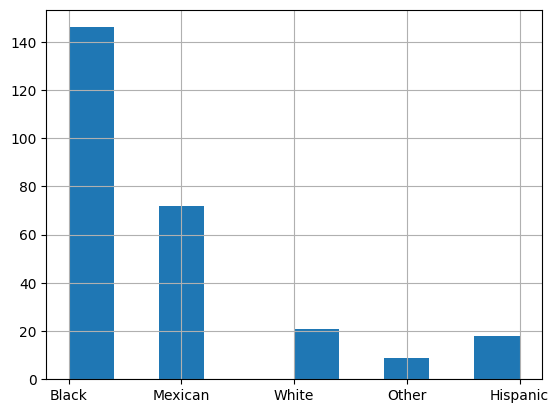

In [ ]:
demographics[(demographics['Ethnicity'].isin(['Black', 'White', 'Hispanic', 'Mexican', 'Other'])) & (demographics['CDCR #'].isin(el_cdcr_nums_5))]['Ethnicity'].hist()
print('Ethnicities of the individuals in Cohort 1 who meet all 5 eligibility criteria')

Ethnicities of the individuals in Cohort 1 who meet all 5 eligibility criteria


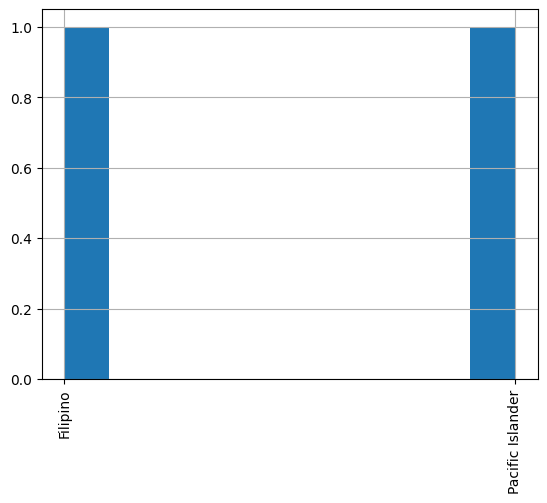

In [ ]:
demographics[(~demographics['Ethnicity'].isin(['Black', 'White', 'Hispanic', 'Mexican', 'Other'])) & (demographics['CDCR #'].isin(el_cdcr_nums_5))]['Ethnicity'].hist(xrot = 90)
print('Ethnicities of the individuals in Cohort 1 who meet all 5 eligibility criteria')

#Conditions for Qualification

Cohort 1

Adults



1.   Age 50 and older; AND
2.   Sentenced to 20 years or more; AND
3.   Served a minimum of 10 years in custody; AND
4.   Is not serving a current sentence for any offense listed in Table A, B, C, or D, AND
5.   Does not have a prior conviction for any offense listed in Tables C & D

Cohort 2

Minors Tried as Adults

1.   Sentenced for a crime that was committed at age 14 or 15; AND
2.   Not serving current sentence for any offense listed in Table E or D; AND
3. Has served a minimum of 10 years in custody; AND
4. Does not have a prior conviction for any offense listed in Table D.

# Identify Candidates: Juvenile (Part 3/4)

Conditions to search:

  1., 2. for Cohort 2



In [ ]:
# Extracting CDCR numbers that meet the age criteria
el_cdcr_nums_1 = []
el_cdcr_nums_1 = demographics[(demographics['Age during offense'] < 16) & (demographics['Age during offense'] >= 14)]['CDCR #'].to_list()
print('Number of CDCR#s that committed offenses at the age of 14 to 15: ', len(el_cdcr_nums_1))

Number of CDCR#s that committed offenses at the age of 14 to 15:  245


In [ ]:
# Extracting ineligible offenses from sorting criteria
inel_offenses = sorting_criteria[sorting_criteria['Table'].isin(['Table E', 'Table D'])]['Offenses'].tolist()
inel_offenses = gen_inel_off(inel_offenses, clean = True, impl = {'187': ["2nd", "(664)"]}, perm = 2)

# Clean offense data in current commits file
current_commits['Offense cleaned'] = clean_offense_blk(data = current_commits['Offense'])

# Extracting CDCR numbers that meet the age criteria and offense eligibility
el_cdcr_nums_2 = []
for cdcr_num in tqdm(el_cdcr_nums_1):
  # Extracting offenses of the CDCR number
  offenses = current_commits[current_commits['CDCR #'] == cdcr_num]['Offense cleaned'].unique()
  if len(det_inel_off(offenses = offenses, inel_offenses = inel_offenses, pop = 'juvenile')) == 0:
    el_cdcr_nums_2.append(cdcr_num)

print('\nNumber of CDCR#s that committed offenses at age 14 and 15 and have eligible current offenses: ', len(el_cdcr_nums_2))

100%|██████████| 245/245 [00:02<00:00, 85.08it/s]


Number of CDCR#s that committed offenses at age 14 and 15 and have eligible current offenses:  62


# Identify Candidates: Juvenile (Part 4/4)

Conditions to search:
3. and 4. for Cohort 2

In [ ]:
# Extracting CDCR numbers that met the age and offense criteria that also meet the time served criteria
el_cdcr_nums_3 = []
el_cdcr_nums_3 = demographics[(demographics['Time served in years'] >= 10) & demographics['CDCR #'].isin(el_cdcr_nums_2)]['CDCR #'].to_list()
print('Number of CDCR#s that committed offenses at age 14 and 15, have eligible current offenses and served more than 10 years: ', len(el_cdcr_nums_3))

Number of CDCR#s that committed offenses at age 14 and 15, have eligible current offenses and served more than 10 years:  60


In [ ]:
# Extracting ineligible offenses from sorting criteria
inel_offenses = sorting_criteria[sorting_criteria['Table'].isin(['Table D'])]['Offenses'].tolist()
inel_offenses = gen_inel_off(inel_offenses, clean = True, impl = {'187': ["2nd", "(664)"]}, perm = 2)

# Clean offense data in current commits file
prior_commits['Offense cleaned'] = clean_offense_blk(data = prior_commits['Offense'])

# Extracting CDCR numbers that met the age, time sentenced and current and prior offense eligibility criteria
el_cdcr_nums_4 = []
for cdcr_num in tqdm(el_cdcr_nums_3):
  offenses = prior_commits[prior_commits['CDCR #'] == cdcr_num]['Offense cleaned'].unique()
  if len(det_inel_off(offenses = offenses, inel_offenses = inel_offenses, pop = 'juvenile')) == 0:
    el_cdcr_nums_4.append(cdcr_num)

print('\nNumber of CDCR#s that committed offenses at age 14 and 15, have eligible current and prior offenses, and served more than 10 years: ', len(el_cdcr_nums_4))

100%|██████████| 60/60 [00:00<00:00, 149.03it/s]


Number of CDCR#s that committed offenses at age 14 and 15, have eligible current and prior offenses, and served more than 10 years:  60


Individuals in Cohort 2 who meet all the eligibility criteria

In [ ]:
# Write data to excel files
write_path = '/'.join([data_path, county_name, month, 'juvenile_eligible_demographics.xlsx'])
demographics[demographics['CDCR #'].isin(el_cdcr_nums_4)].to_excel(write_path, index = False)

In [ ]:
# Write data to excel files
write_path = '/'.join([data_path, county_name, month, 'juvenile_eligible_currentcommits.xlsx'])
current_commits[current_commits['CDCR #'].isin(el_cdcr_nums_4)].to_excel(write_path, index = False)

Exploring Cohort 1 offenses, racial makeup, penal codes


In [ ]:
print('Top 20 offenses of individuals in Cohort 2 who meet all 4 eligibility conditions (from demographics data)')
print(demographics[demographics['CDCR #'].isin(el_cdcr_nums_4)]['Description'].value_counts()[0:20])

Top 20 offenses of individuals in Cohort 2 who meet all 4 eligibility conditions (from demographics data)
Voluntary Manslaughter                                   18
Robbery 2nd                                              17
Carjacking                                               10
Discharge Firearm Inhabited Dwelling/Vehicle/Aircraft     3
Kidnap/Carjacking                                         3
Assault with Semiautomatic Firearm                        2
Assault with a Firearm                                    2
Robbery 1st                                               2
Kidnap                                                    1
Assault w/Firearm on Peace Officer/Firefighter            1
Assault with Intent to Commit Sex Offense /Burglary       1
Name: Description, dtype: int64


In [ ]:
print('Top 20 offenses of individuals in Cohort 2 who meet all 4 eligibility conditions (from demographics data)')
demographics[demographics['CDCR #'].isin(el_cdcr_nums_4)]['Controlling Offense'].value_counts()[0:20]

Top 20 offenses of individuals in Cohort 2 who meet all 4 eligibility conditions (from demographics data)


PC192(a)       18
PC212.5(c)     17
PC215          10
PC246           3
PC209.5(a)      3
PC245(b)        2
PC245(a)(2)     2
PC212.5(a)      2
PC207(a)        1
PC245(d)(1)     1
PC220(b)        1
Name: Controlling Offense, dtype: int64

In [ ]:
print('Sex offenses of individuals in Cohort 2 who meet all 4 eligibility conditions')
print(demographics[demographics['CDCR #'].isin(el_cdcr_nums_4)]['Sex Registrant'].value_counts())

Sex offenses of individuals in Cohort 2 who meet all 4 eligibility conditions
No     59
Yes     1
Name: Sex Registrant, dtype: int64


In [ ]:
print('Type of offenses of individuals in Cohort 2 who meet all 4 eligibility conditions')
print(demographics[demographics['CDCR #'].isin(el_cdcr_nums_4)]['Offense Category'].value_counts())

Type of offenses of individuals in Cohort 2 who meet all 4 eligibility conditions
Crimes Against Persons    60
Name: Offense Category, dtype: int64


Ethnicities of the individuals in Cohort 2 who meet all 4 eligibility criteria


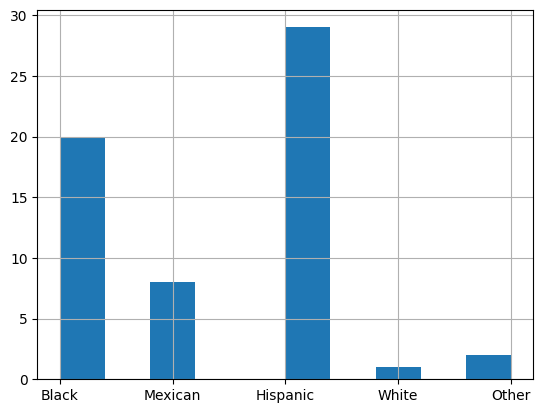

In [ ]:
demographics[(demographics['Ethnicity'].isin(['Black', 'White', 'Hispanic', 'Mexican', 'Other'])) & (demographics['CDCR #'].isin(el_cdcr_nums_4))]['Ethnicity'].hist()
print('Ethnicities of the individuals in Cohort 2 who meet all 4 eligibility criteria')

Generate summary


In [ ]:
# Write data to excel files
write_path = '/'.join([data_path, county_name, month, 'summary_juvenile.xlsx'])

In [ ]:
# Get demographics data
df = demographics.loc[demographics['CDCR #'].isin(el_cdcr_nums_4)][['CDCR #', 'Current Security Level', 'Controlling Offense',
                                                                    'Current Classication Score', 'Classification Score 5 Years\nAgo',
                                                                    'Mental Health Level of Care', 'DPPV Disability - Mobility']]

# Remove new-line
df.rename(columns = {'Classification Score 5 Years\nAgo': 'Classification Score 5 Years Ago'}, inplace = True)
rv_report.rename(columns = {'Rule\nViolation\nDate': 'Rule Violation Date'}, inplace = True)

# Format mobility disability
df['DPPV Disability - Mobility'] = df['DPPV Disability - Mobility'].str.replace('Impacting Placement', '')

# Initialize lists for other variables
current_conv = []
prior_conv = []
programming = []
rvr = []
for cdcr_num in df['CDCR #']:
  # Current convictions
  current_conv.append(', '.join(current_commits[current_commits['CDCR #'] == cdcr_num]['Offense'].tolist()))
  # Previous convictions
  prior_conv.append(', '.join(prior_commits[prior_commits['CDCR #'] == cdcr_num]['Offense'].tolist()))
  # Participation in programming
  if (cdcr_num in merit_credit['Cdcno']) or (cdcr_num in milestone_credit['Cdcno']) or (cdcr_num in rehab_credit['Cdcno']) or (cdcr_num in voced_credit['Cdcno']):
    programming.append('Yes')
  else:
    programming.append('No')
  # Rule violation reports
  ext = rv_report[rv_report['CDCR\nNumber'] == cdcr_num][['Rule Violation Date', 'Division', 'Rule Violation']].reset_index(drop = True).to_dict('index')
  rvr.append("\n\n".join("\n".join(k_b + ': ' + str(v_b) for k_b, v_b in v_a.items()) for k_a, v_a in ext.items()))

# Store lists in dataframe
df['Current Convictions'] = current_conv
df['Prior Convictions'] = prior_conv
df['Programming'] = programming
df['Rules Violations'] = rvr

# Write data to excel files
df.to_excel(write_path, index = False)